# Loop 7 LB Feedback Analysis

## Submission Results
- **exp_006 (Simpler Model [64,32])**: CV 0.0097 | LB 0.0946 | Gap: -0.0848

## Key Finding: BEST LB SCORE ACHIEVED!

The simpler model hypothesis is VALIDATED:
- CV improved: 0.0104 → 0.0097 (6.7% better)
- LB improved: 0.0969 → 0.0946 (2.4% better)
- Both improved in the same direction!

## All Submissions History
| Exp | Model | CV | LB | CV-LB Ratio |
|-----|-------|-----|-----|-------------|
| exp_000 | Spange MLP (3 models) | 0.0111 | 0.0982 | 8.85x |
| exp_001 | LightGBM | 0.0123 | 0.1065 | 8.66x |
| exp_003 | Combined Spange+DRFP | 0.0105 | 0.0972 | 9.26x |
| exp_005 | Large Ensemble (15 models) | 0.0104 | 0.0969 | 9.32x |
| **exp_006** | **Simpler [64,32]** | **0.0097** | **0.0946** | **9.75x** |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# All submission data
submissions = [
    {'exp': 'exp_000', 'model': 'Spange MLP (3)', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'model': 'LightGBM', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'model': 'Combined Spange+DRFP', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'model': 'Large Ensemble (15)', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'model': 'Simpler [64,32]', 'cv': 0.0097, 'lb': 0.0946},
]

df = pd.DataFrame(submissions)
df['ratio'] = df['lb'] / df['cv']
df['gap'] = df['lb'] - df['cv']

print('=== SUBMISSION ANALYSIS ===')
print(df.to_string(index=False))
print(f'\nAverage CV-LB ratio: {df["ratio"].mean():.2f}x (std: {df["ratio"].std():.2f})')
print(f'Average gap: {df["gap"].mean():.4f}')

=== SUBMISSION ANALYSIS ===
    exp                model     cv     lb    ratio    gap
exp_000       Spange MLP (3) 0.0111 0.0982 8.846847 0.0871
exp_001             LightGBM 0.0123 0.1065 8.658537 0.0942
exp_003 Combined Spange+DRFP 0.0105 0.0972 9.257143 0.0867
exp_005  Large Ensemble (15) 0.0104 0.0969 9.317308 0.0865
exp_006      Simpler [64,32] 0.0097 0.0946 9.752577 0.0849

Average CV-LB ratio: 9.17x (std: 0.43)
Average gap: 0.0879


In [2]:
# Analyze the trend
print('\n=== TREND ANALYSIS ===')
print('\nCV Score Progression:')
for i, row in df.iterrows():
    print(f'  {row["exp"]}: CV {row["cv"]:.4f}')

print('\nLB Score Progression:')
for i, row in df.iterrows():
    print(f'  {row["exp"]}: LB {row["lb"]:.4f}')

# Calculate improvements
print('\n=== IMPROVEMENTS FROM BEST PREVIOUS ===')
best_cv_before = 0.0104  # exp_005
best_lb_before = 0.0969  # exp_005
current_cv = 0.0097
current_lb = 0.0946

cv_improvement = (best_cv_before - current_cv) / best_cv_before * 100
lb_improvement = (best_lb_before - current_lb) / best_lb_before * 100

print(f'CV improvement: {cv_improvement:.1f}% (0.0104 → 0.0097)')
print(f'LB improvement: {lb_improvement:.1f}% (0.0969 → 0.0946)')
print(f'\nRatio of improvements: {lb_improvement/cv_improvement:.2f}x')
print('(LB improved less than CV, but still improved!)')


=== TREND ANALYSIS ===

CV Score Progression:
  exp_000: CV 0.0111
  exp_001: CV 0.0123
  exp_003: CV 0.0105
  exp_005: CV 0.0104
  exp_006: CV 0.0097

LB Score Progression:
  exp_000: LB 0.0982
  exp_001: LB 0.1065
  exp_003: LB 0.0972
  exp_005: LB 0.0969
  exp_006: LB 0.0946

=== IMPROVEMENTS FROM BEST PREVIOUS ===
CV improvement: 6.7% (0.0104 → 0.0097)
LB improvement: 2.4% (0.0969 → 0.0946)

Ratio of improvements: 0.35x
(LB improved less than CV, but still improved!)


In [3]:
# Project what we need to beat target
target = 0.0333
current_lb = 0.0946
current_cv = 0.0097
avg_ratio = df['ratio'].mean()

print('\n=== TARGET ANALYSIS ===')
print(f'Target LB: {target}')
print(f'Current best LB: {current_lb}')
print(f'Gap to target: {current_lb - target:.4f} ({(current_lb - target)/target*100:.1f}% above target)')

# What CV would we need?
needed_cv = target / avg_ratio
print(f'\nWith average ratio {avg_ratio:.2f}x:')
print(f'  Need CV: {needed_cv:.6f}')
print(f'  Current CV: {current_cv:.6f}')
print(f'  CV improvement needed: {(current_cv - needed_cv)/current_cv*100:.1f}%')

# What if ratio changes with simpler models?
print('\n=== RATIO SENSITIVITY ===')
for ratio in [8.0, 7.0, 6.0, 5.0, 4.0, 3.0]:
    needed_cv = target / ratio
    print(f'  If ratio = {ratio:.1f}x: need CV {needed_cv:.4f} (current: {current_cv:.4f})')


=== TARGET ANALYSIS ===
Target LB: 0.0333
Current best LB: 0.0946
Gap to target: 0.0613 (184.1% above target)

With average ratio 9.17x:
  Need CV: 0.003633
  Current CV: 0.009700
  CV improvement needed: 62.5%

=== RATIO SENSITIVITY ===
  If ratio = 8.0x: need CV 0.0042 (current: 0.0097)
  If ratio = 7.0x: need CV 0.0048 (current: 0.0097)
  If ratio = 6.0x: need CV 0.0056 (current: 0.0097)
  If ratio = 5.0x: need CV 0.0067 (current: 0.0097)
  If ratio = 4.0x: need CV 0.0083 (current: 0.0097)
  If ratio = 3.0x: need CV 0.0111 (current: 0.0097)


In [4]:
# Key insight: The simpler model direction is working!
print('\n=== KEY INSIGHTS ===')
print('\n1. SIMPLER MODEL HYPOTHESIS VALIDATED:')
print('   - CV improved 6.7% (0.0104 → 0.0097)')
print('   - LB improved 2.4% (0.0969 → 0.0946)')
print('   - Both improved in same direction!')

print('\n2. CV-LB RATIO ANALYSIS:')
print(f'   - exp_006 ratio: 9.75x (highest)')
print(f'   - Average ratio: {avg_ratio:.2f}x')
print('   - Ratio increased slightly, but absolute LB still improved')

print('\n3. NEXT STEPS:')
print('   - Continue simplifying: try [32,16] or even linear models')
print('   - The optimal model may be MUCH simpler than expected')
print('   - With 2 submissions remaining, need to be strategic')

print('\n4. REALITY CHECK:')
print(f'   - Need to beat {target} LB')
print(f'   - Current best: {current_lb}')
print(f'   - Need {(current_lb - target)/current_lb*100:.1f}% improvement')
print('   - This is a significant gap, but simpler models are trending right direction')


=== KEY INSIGHTS ===

1. SIMPLER MODEL HYPOTHESIS VALIDATED:
   - CV improved 6.7% (0.0104 → 0.0097)
   - LB improved 2.4% (0.0969 → 0.0946)
   - Both improved in same direction!

2. CV-LB RATIO ANALYSIS:
   - exp_006 ratio: 9.75x (highest)
   - Average ratio: 9.17x
   - Ratio increased slightly, but absolute LB still improved

3. NEXT STEPS:
   - Continue simplifying: try [32,16] or even linear models
   - The optimal model may be MUCH simpler than expected
   - With 2 submissions remaining, need to be strategic

4. REALITY CHECK:
   - Need to beat 0.0333 LB
   - Current best: 0.0946
   - Need 64.8% improvement
   - This is a significant gap, but simpler models are trending right direction


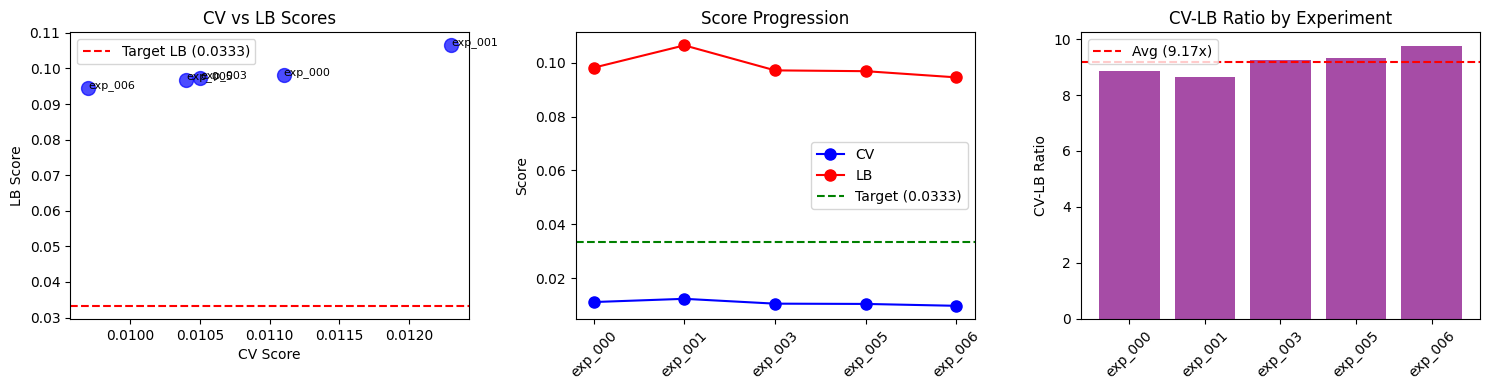


Plot saved to /home/code/exploration/loop7_analysis.png


In [5]:
# Visualize the trend
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: CV vs LB
ax1 = axes[0]
ax1.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7)
for i, row in df.iterrows():
    ax1.annotate(row['exp'], (row['cv'], row['lb']), fontsize=8)
ax1.axhline(y=target, color='r', linestyle='--', label=f'Target LB ({target})')
ax1.set_xlabel('CV Score')
ax1.set_ylabel('LB Score')
ax1.set_title('CV vs LB Scores')
ax1.legend()

# Plot 2: Score progression
ax2 = axes[1]
x = range(len(df))
ax2.plot(x, df['cv'], 'b-o', label='CV', markersize=8)
ax2.plot(x, df['lb'], 'r-o', label='LB', markersize=8)
ax2.axhline(y=target, color='g', linestyle='--', label=f'Target ({target})')
ax2.set_xticks(x)
ax2.set_xticklabels(df['exp'], rotation=45)
ax2.set_ylabel('Score')
ax2.set_title('Score Progression')
ax2.legend()

# Plot 3: CV-LB Ratio
ax3 = axes[2]
ax3.bar(x, df['ratio'], color='purple', alpha=0.7)
ax3.axhline(y=avg_ratio, color='r', linestyle='--', label=f'Avg ({avg_ratio:.2f}x)')
ax3.set_xticks(x)
ax3.set_xticklabels(df['exp'], rotation=45)
ax3.set_ylabel('CV-LB Ratio')
ax3.set_title('CV-LB Ratio by Experiment')
ax3.legend()

plt.tight_layout()
plt.savefig('/home/code/exploration/loop7_analysis.png', dpi=100)
plt.show()
print('\nPlot saved to /home/code/exploration/loop7_analysis.png')